<a href="https://colab.research.google.com/github/kohi2112002/WineQuality/blob/cMatrix/WineQuality_CMForAll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone **DATA**


In [225]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix

In [226]:
!git clone https://github.com/kohi2112002/WineQuality.git

fatal: destination path 'WineQuality' already exists and is not an empty directory.


In [227]:
# upload file to drive
red_path = '/content/WineQuality/winequality-red.csv'
white_path = '/content/WineQuality/winequality-white.csv'

In [228]:
# read file into dataframe
red_df = pd.read_csv(red_path)
white_df = pd.read_csv(white_path)
full = pd.concat([red_df, white_df])

In [229]:
# check 
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


# **Check data**

Text(0.5, 1.0, 'Correlation between variables')

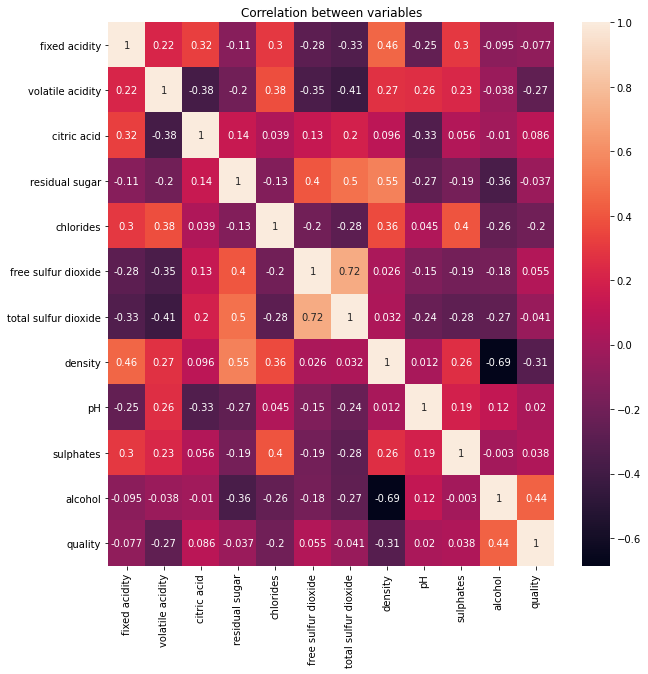

In [230]:
#Check correlation
corr = full.corr()
fig, ax = plt.subplots(figsize = (10,10))
g= sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between variables')

In [231]:
corr_vec = full.corr()['quality']
print(abs(corr_vec) > 0.05)
print((abs(corr_vec)).idxmin())

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide    False
density                  True
pH                      False
sulphates               False
alcohol                  True
quality                  True
Name: quality, dtype: bool
pH


In [232]:
#Remove not needed data
opt_data = full.drop(['residual sugar','pH','sulphates','total sulfur dioxide'], axis = 1)

In [233]:
#Scale data
scaler = MinMaxScaler()

#this function return scaled data
def Khoi_Scaler(data):
  scaler.fit(data)
  return scaler.transform(data)

In [234]:
#Data partition

#This is function return train and target data set
def needed_data(data, target_label, index):
  #Scale data
  data = Khoi_Scaler(data)
  #split data
  X_train_full1, X_test_full1,Y_train_full1,Y_test_full1 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 100)
  X_train_full2, X_test_full2,Y_train_full2, Y_test_full2 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 220)
  X_train_full3, X_test_full3,Y_train_full3,Y_test_full3 = train_test_split(np.delete(data, index, axis = 1),data[:,index], test_size = 0.1, random_state = 343)
  #store data
  train_full = [X_train_full1, X_train_full2, X_train_full3]
  test_full = [X_test_full1, X_test_full2, X_test_full3]
  Y_test_full = [Y_test_full1, Y_test_full2, Y_test_full3]  
  #return data
  return [train_full, test_full, Y_test_full]

# **K mean clustering**

## **Preparation**

In [235]:
all_label_target = opt_data.columns

In [236]:
#This function calculate the 
def re_cm(cnf_matrix):
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)

  return [ACC, TPR, FPR, FNR, PPV]

## **K mean with 2 cluster**

In [239]:
len_target = len(all_label_target)
for i in range(len_target):
  # Get needed data
  [train, test, y_actual] = needed_data(opt_data, all_label_target[i], i)
  #Train
  pred = []
  for j in range(len(train)):
    model_kmeans = KMeans(n_clusters=2, random_state=0).fit(train[j])
    #Test
    pred.append(model_kmeans.predict(test[j]))
    #Confusion Matrix
    cmatrix = confusion_matrix(y_actual[j].astype(np.int16), pred[j])
    cal = re_cm(cmatrix)
    print("THE CONFUSION MATRIX OF {0} in {1}th test: \n{2}\n".format(all_label_target[i], j, cmatrix))
    print("The Accuracy is: {0} \nThe True positive rate is: {1} \nThe False Positive Rate is: {2} \nThe False Negative Rate is:{3} \nThe Precision is {4}\n".format(cal[0], cal[1], cal[2], cal[3], cal[4]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF fixed acidity in 0th test: 
[[393 257]
 [  0   0]]

The Accuracy is: [0.60461538 0.60461538] 
The True positive rate is: [0.60461538        nan] 
The False Positive Rate is: [       nan 0.39538462] 
The False Negative Rate is:[0.39538462        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF fixed acidity in 1th test: 
[[403 247]
 [  0   0]]

The Accuracy is: [0.62 0.62] 
The True positive rate is: [0.62  nan] 
The False Positive Rate is: [ nan 0.38] 
The False Negative Rate is:[0.38  nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF fixed acidity in 2th test: 
[[388 262]
 [  0   0]]

The Accuracy is: [0.59692308 0.59692308] 
The True positive rate is: [0.59692308        nan] 
The False Positive Rate is: [       nan 0.40307692] 
The False Negative Rate is:[0.40307692        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF volatile acidity in 0th test: 
[[256 394]
 [  0   0]]

The Accuracy is: [0.39384615 0.39384615] 
The True positive rate is: [0.39384615        nan] 
The False Positive Rate is: [       nan 0.60615385] 
The False Negative Rate is:[0.60615385        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF volatile acidity in 1th test: 
[[234 416]
 [  0   0]]

The Accuracy is: [0.36 0.36] 
The True positive rate is: [0.36  nan] 
The False Positive Rate is: [ nan 0.64] 
The False Negative Rate is:[0.64  nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF volatile acidity in 2th test: 
[[395 255]
 [  0   0]]

The Accuracy is: [0.60769231 0.60769231] 
The True positive rate is: [0.60769231        nan] 
The False Positive Rate is: [       nan 0.39230769] 
The False Negative Rate is:[0.39230769        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF citric acid in 0th test: 
[[392 258]
 [  0   0]]

The Accuracy is: [0.60307692 0.60307692] 
The True positive rate is: [0.60307692        nan] 
The False Positive Rate is: [       nan 0.39692308] 
The False Negative Rate is:[0.39692308        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF citric acid in 1th test: 
[[243 407]
 [  0   0]]

The Accuracy is: [0.37384615 0.37384615] 
The True positive rate is: [0.37384615        nan] 
The False Positive Rate is: [       nan 0.62615385] 
The False Negative Rate is:[0.62615385        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF citric acid in 2th test: 
[[387 263]
 [  0   0]]

The Accuracy is: [0.59538462 0.59538462] 
The True positive rate is: [0.59538462        nan] 
The False Positive Rate is: [       nan 0.40461538] 
The False Negative Rate is:[0.40461538        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF chlorides in 0th test: 
[[394 256]
 [  0   0]]

The Accuracy is: [0.60615385 0.60615385] 
The True positive rate is: [0.60615385        nan] 
The False Positive Rate is: [       nan 0.39384615] 
The False Negative Rate is:[0.39384615        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF chlorides in 1th test: 
[[409 241]
 [  0   0]]

The Accuracy is: [0.62923077 0.62923077] 
The True positive rate is: [0.62923077        nan] 
The False Positive Rate is: [       nan 0.37076923] 
The False Negative Rate is:[0.37076923        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF chlorides in 2th test: 
[[390 260]
 [  0   0]]

The Accuracy is: [0.6 0.6] 
The True positive rate is: [0.6 nan] 
The False Positive Rate is: [nan 0.4] 
The False Negative Rate is:[0.4 nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF free sulfur dioxide in 0th test: 
[[392 258]
 [  0   0]]

The Accuracy is: [0.60307692 0.60307692] 
The True positive rate is: [0.60307692        nan] 
The False Positive Rate is: [       nan 0.39692308] 
The False Negative Rate is:[0.39692308        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF free sulfur dioxide in 1th test: 
[[406 244]
 [  0   0]]

The Accuracy is: [0.62461538 0.62461538] 
The True positive rate is: [0.62461538        nan] 
The False Positive Rate is: [       nan 0.37538462] 
The False Negative Rate is:[0.37538462        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF free sulfur dioxide in 2th test: 
[[387 263]
 [  0   0]]

The Accuracy is: [0.59538462 0.59538462] 
The True positive rate is: [0.59538462        nan] 
The False Positive Rate is: [       nan 0.40461538] 
The False Negative Rate is:[0.40461538        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF density in 0th test: 
[[398 252]
 [  0   0]]

The Accuracy is: [0.61230769 0.61230769] 
The True positive rate is: [0.61230769        nan] 
The False Positive Rate is: [       nan 0.38769231] 
The False Negative Rate is:[0.38769231        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF density in 1th test: 
[[410 240]
 [  0   0]]

The Accuracy is: [0.63076923 0.63076923] 
The True positive rate is: [0.63076923        nan] 
The False Positive Rate is: [       nan 0.36923077] 
The False Negative Rate is:[0.36923077        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF density in 2th test: 
[[393 257]
 [  0   0]]

The Accuracy is: [0.60461538 0.60461538] 
The True positive rate is: [0.60461538        nan] 
The False Positive Rate is: [       nan 0.39538462] 
The False Negative Rate is:[0.39538462        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF alcohol in 0th test: 
[[288 362]
 [  0   0]]

The Accuracy is: [0.44307692 0.44307692] 
The True positive rate is: [0.44307692        nan] 
The False Positive Rate is: [       nan 0.55692308] 
The False Negative Rate is:[0.55692308        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: inv

THE CONFUSION MATRIX OF alcohol in 1th test: 
[[289 361]
 [  0   0]]

The Accuracy is: [0.44461538 0.44461538] 
The True positive rate is: [0.44461538        nan] 
The False Positive Rate is: [       nan 0.55538462] 
The False Negative Rate is:[0.55538462        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF alcohol in 2th test: 
[[370 280]
 [  0   0]]

The Accuracy is: [0.56923077 0.56923077] 
The True positive rate is: [0.56923077        nan] 
The False Positive Rate is: [       nan 0.43076923] 
The False Negative Rate is:[0.43076923        nan] 
The Precision is [1. 0.]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


THE CONFUSION MATRIX OF quality in 0th test: 
[[259 391]
 [  0   0]]

The Accuracy is: [0.39846154 0.39846154] 
The True positive rate is: [0.39846154        nan] 
The False Positive Rate is: [       nan 0.60153846] 
The False Negative Rate is:[0.60153846        nan] 
The Precision is [1. 0.]

THE CONFUSION MATRIX OF quality in 1th test: 
[[396 253]
 [  0   1]]

The Accuracy is: [0.61076923 0.61076923] 
The True positive rate is: [0.61016949 1.        ] 
The False Positive Rate is: [0.         0.38983051] 
The False Negative Rate is:[0.38983051 0.        ] 
The Precision is [1.         0.00393701]

THE CONFUSION MATRIX OF quality in 2th test: 
[[385 264]
 [  1   0]]

The Accuracy is: [0.59230769 0.59230769] 
The True positive rate is: [0.59322034 0.        ] 
The False Positive Rate is: [1.         0.40677966] 
The False Negative Rate is:[0.40677966 1.        ] 
The Precision is [0.99740933 0.        ]



## **Preparation**